In [1]:
#pip install chatterbot nltk

In [2]:
#pip install pandas numpy matplotlib seaborn scikit-learn keras

In [3]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import chatterbot
from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, LSTM
from sklearn.metrics import mean_absolute_error

In [4]:
#This line of code uses the read_csv function from the pandas library to read data from a CSV file and store it in an object called df 
df = pd.read_csv("coin_Bitcoin.csv")

In [5]:
#The head() function in pandas is used to display the first few rows of a DataFrame.
#When applied to the DataFrame df that you've loaded from the "coin_Bitcoin.csv" file, it will show you the first five rows by default.
df.head()

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [6]:
#Data types
print(f"Les types de données dans notre dataset sont:\n{df.dtypes}\n")

Les types de données dans notre dataset sont:
SNo            int64
Name          object
Symbol        object
Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume       float64
Marketcap    float64
dtype: object



In [7]:
#Empty cells
print(f"The number of empty cells in our dataset is:\n{df.isna().sum()}")

The number of empty cells in our dataset is:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64


In [8]:
#Dropping columns: It removes the columns 'SNo', 'Name', and 'Symbol' from the DataFrame.
#Transforming the 'Date' column: It modifies the 'Date' column to keep only the date part in the "YYYY-MM-dd" format

df = df.drop(['SNo', 'Name','Symbol'], axis=1)
df['Date'] = df['Date'].apply(lambda x: x.split()[0])

In [9]:
#This code sets the 'Date' column as the index of the DataFrame:
df = df.set_index('Date', drop=True)

In [10]:
# Filter the DataFrame to exclude data prior to January 1, 2014
df=df[df.index>='2014-01-01']

In [11]:
# This Code f.head() is used to display the first few rows of the DataFrame.
df.head()

,High,Low,Open,Close,Volume,Marketcap
Date,,,,,,
2014-01-01,775.349976,754.969971,754.969971,771.400024,22489400.0,9.403308e+09
2014-01-02,820.309998,767.210022,773.440002,802.390015,38489500.0,9.781074e+09
2014-01-03,834.150024,789.119995,802.849976,818.719971,37810100.0,9.980135e+09
2014-01-04,859.510010,801.669983,823.270020,859.510010,38005000.0,1.047736e+10
2014-01-05,952.400024,854.520020,858.549988,933.530029,72898496.0,1.137966e+10


In [12]:
#The df.describe() function is used to generate descriptive statistics of the DataFrame
df.describe()

,High,Low,Open,Close,Volume,Marketcap
count,2744.000000,2744.000000,2744.000000,2744.000000,2.744000e+03,2.744000e+03
mean,7489.534333,7048.233568,7280.246366,7292.183039,1.188801e+10,1.314806e+11
std,11976.993187,11177.611238,11610.796734,11621.015546,1.942284e+10,2.171195e+11
min,211.731003,171.509995,176.897003,178.102997,2.857830e+06,2.444379e+09
25%,504.874001,482.110764,492.291260,491.788757,4.922518e+07,6.939725e+09
50%,3777.341713,3623.317190,3673.608484,3678.744329,2.260650e+09,6.427960e+10
75%,9167.717183,8757.263976,8915.889013,8912.858386,1.758296e+10,1.589677e+11
max,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [13]:
#The df.info() function provides a concise summary of the DataFrame, 
#including information about the data types, non-null values, and memory usage. 
#It's a useful method to quickly inspect the structure of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2744 entries, 2014-01-01 to 2021-07-06
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2744 non-null   float64
 1   Low        2744 non-null   float64
 2   Open       2744 non-null   float64
 3   Close      2744 non-null   float64
 4   Volume     2744 non-null   float64
 5   Marketcap  2744 non-null   float64
dtypes: float64(6)
memory usage: 150.1+ KB


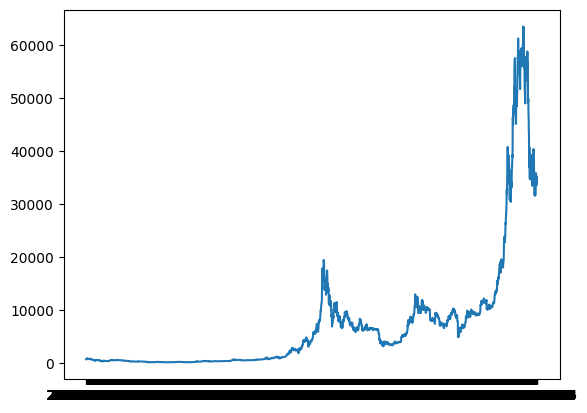

In [14]:
# Plotting the closing prices of Bitcoin against dates
plt.plot(df.index, df['Close'])

# Displaying the plot
plt.show()

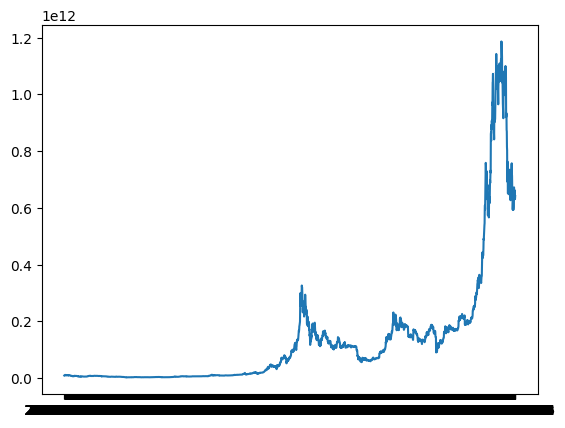

In [15]:
# Plotting the market capitalization of Bitcoin
plt.plot(df['Marketcap'])

# Displaying the plot
plt.show()

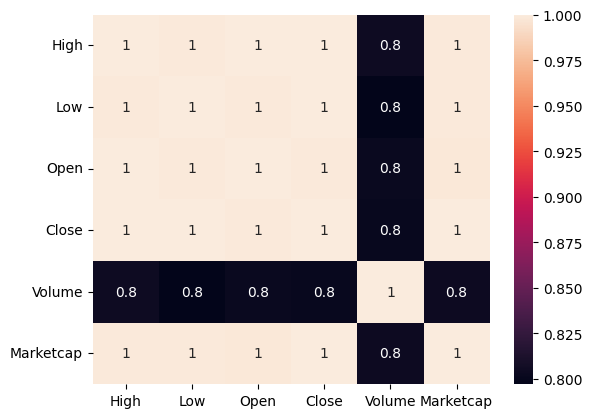

In [16]:
# Plotting the correlation matrix to select the appropriate columns

# Calculate the correlation matrix
mat = df.corr()

# Create a heatmap with annotations for correlation values
sb.heatmap(mat, annot=True)

# Displaying the plot
plt.show()

In [17]:
def train_test_split(df, test_size=0.2, shuffle=False, random_seed=None):
    """
    Splits the data into two sets: training and test.

    Parameters:
    - df (pd.DataFrame): The DataFrame to split.
    - test_size (float): The proportion of data to include in the test set.
    - shuffle (bool): Indicates whether the data should be shuffled before the split.
    - random_seed (int): The seed for random number generation, used if shuffle=True.

    Returns:
    - train (pd.DataFrame): The training set.
    - test (pd.DataFrame): The test set.
    """
    if not (0 < test_size < 1):
        raise ValueError("Test size must be between 0 and 1 exclusive.")

    n = len(df)
    split_row = n - int(test_size * n)

    if shuffle:
        if random_seed is not None:
            df = df.sample(frac=1, random_state=random_seed)
        else:
            df = df.sample(frac=1)

    train = df.iloc[:split_row]
    test = df.iloc[split_row:]

    return train, test

In [18]:
#Linear Regression

In [19]:
# In this section, we aim to implement a linear regression model, train it for making predictions, and evaluate its performance.

# Importing the necessary library
from sklearn.linear_model import LinearRegression

# Initializing the linear regression model
regressor = LinearRegression()

In [20]:
# Selecting explanatory variables (features) and target variable
X = df[['Open', 'Volume']]  # Explanatory variables
Y = df['Close']  # Target variable

In [21]:
# Split both explanatory and target variables into training and testing sections

#Calls the train_test_split function on the explanatory variables (X) with a test size of 20%. 
#The result is two sets: xtrain for training data and xtest for testing data.
xtrain, xtest = train_test_split(X, 0.2)

#Similarly, calls the train_test_split function on the target variable (Y) with a test size of 20%.
#The result is two sets: ytrain for training labels and ytest for testing labels.
ytrain, ytest = train_test_split(Y, 0.2)

In [22]:
#Prints the shape (number of samples, number of features) of the training and testing sets for the explanatory variables.
print(xtrain.shape, xtest.shape)

 #Prints the shape (number of samples) of the training and testing sets for the target variable.
print(ytrain.shape, ytest.shape)

(2196, 2) (548, 2)
(2196,) (548,)


In [23]:
#Training the model
regressor.fit(xtrain,ytrain)

LinearRegression()

In [24]:
#Testing the model
ypred=regressor.predict(xtest)

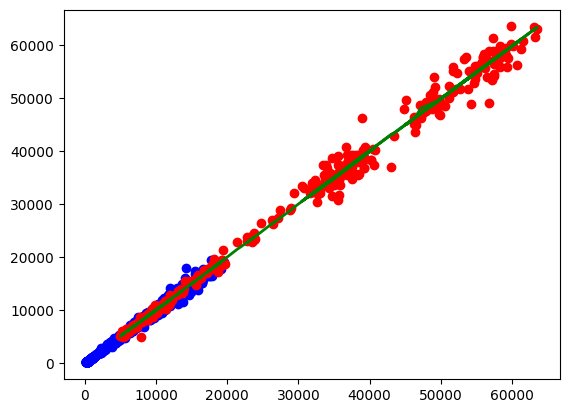

In [25]:
# Plotting the results

# Scatter plot for the training data points (blue color)
plt.scatter(xtrain['Open'], ytrain, color='blue', label='Train Data')

# Scatter plot for the test data points (red color)
plt.scatter(xtest['Open'], ytest, color='red', label='Test Data')

# Plotting the linear regression predictions on the test data (green color, line width 3)
plt.plot(xtest['Open'], ypred, color='green', linewidth=2, label='Linear Regression Prediction')


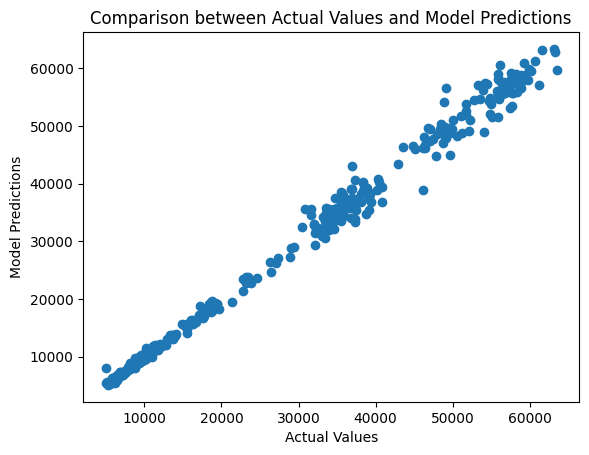

In [26]:
# Plotting predictions against actual values

# Scatter plot comparing the actual values (ytest) and the model predictions (ypred)
plt.scatter(ytest, ypred)

# Setting x-axis label
plt.xlabel("Actual Values")

# Setting y-axis label
plt.ylabel("Model Predictions")

# Setting the title of the plot
plt.title("Comparison between Actual Values and Model Predictions")

# Display the plot
plt.show()


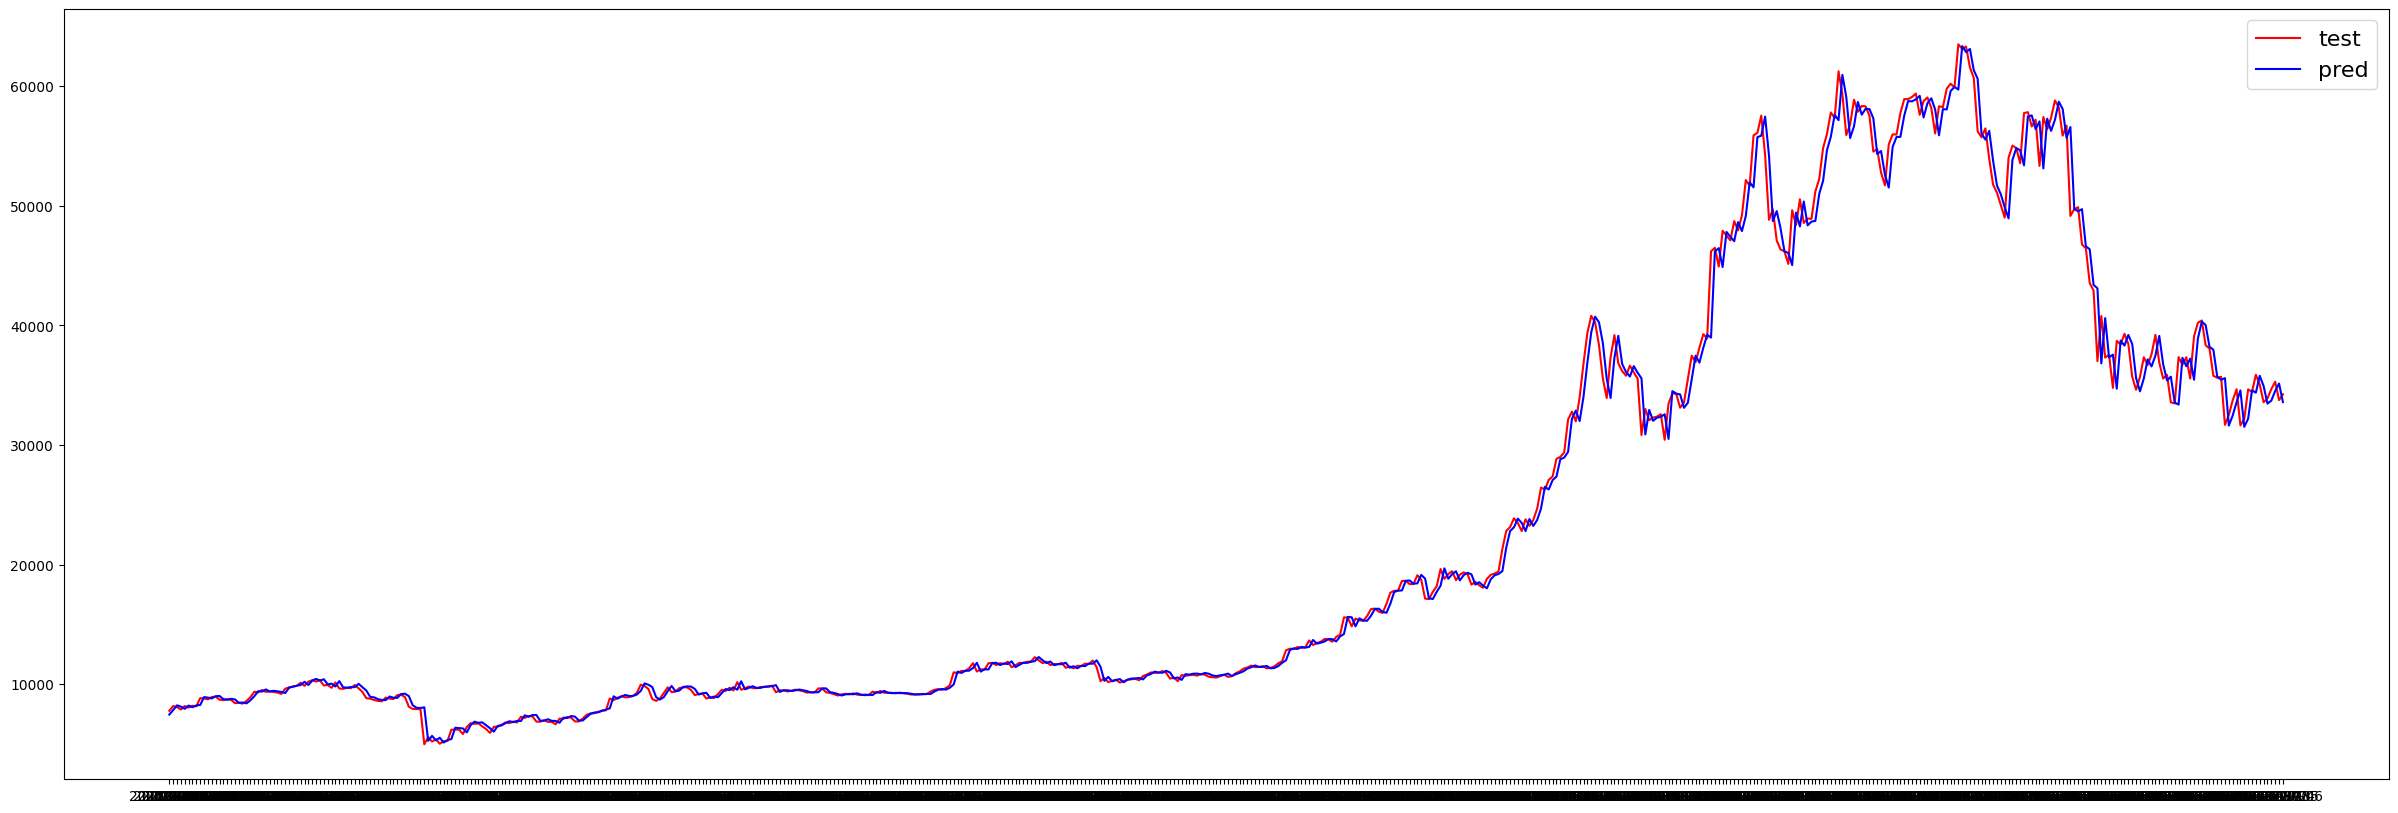

In [27]:
# Plotting the real prices and predicted ones

# Setting the figure size
plt.figure(figsize=(30, 10))

# Plotting the actual prices from the test set (ytest) in red
plt.plot(ytest, label='test', color='red')

# Plotting the predicted prices (ypred) in blue
plt.plot(ypred, label='pred', color='blue')

# Adding a legend to the plot
plt.legend(loc='best', fontsize=16)

# Display the plot
plt.show()


In [28]:
#Comparing the real prices with predicted ones 
print(pd.DataFrame({'real_value':ytest,'pred_value':ypred}))

              real_value    pred_value
Date                                  
2020-01-06   7769.219039   7451.907660
2020-01-07   8163.692239   7827.042092
2020-01-08   8079.862777   8227.767666
2020-01-09   7879.071524   8121.628992
2020-01-10   8166.554140   7935.688401
...                  ...           ...
2021-07-02  33897.048590  33457.016111
2021-07-03  34668.548402  33708.708767
2021-07-04  35287.779766  34515.908720
2021-07-05  33746.002456  35136.596937
2021-07-06  34235.193451  33586.259661

[548 rows x 2 columns]


In [29]:
#As we can see, our model is pretty good and it has high accuracy:
rsquared_adj = 1 - (1-regressor.score(X, Y))*(Y.shape[0]-1)/(Y.shape[0]-X.shape[1]-1)
print(rsquared_adj)

0.9971937112656122


In [30]:
#A small preview of splitting the data
train, test = train_test_split(df,0.2)

In [31]:
# Displaying the shapes of the training and testing sets
print(train.shape, test.shape)

(2196, 6) (548, 6)


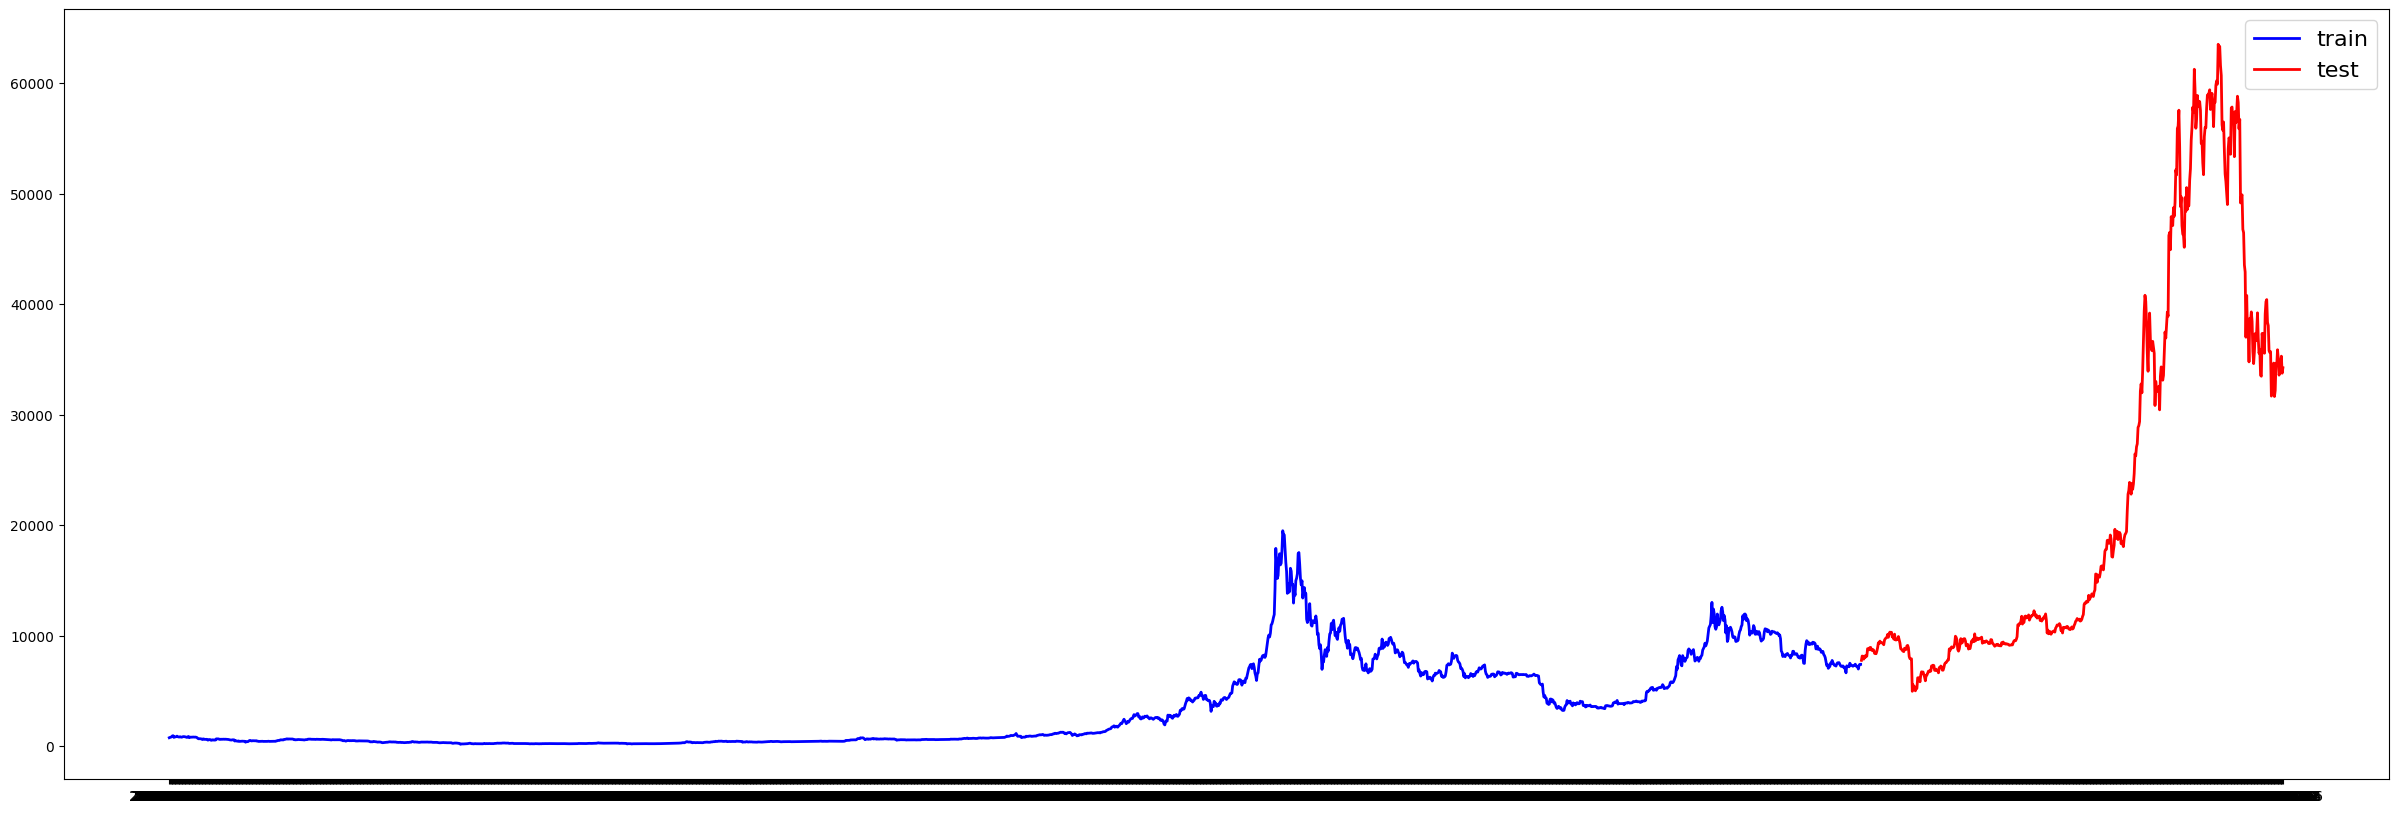

In [32]:
#This block of code creates a large plot with a figure size of 30x10 inches. It plots the closing prices of the training set in blue and the testing set in red
plt.figure(figsize=(30, 10))
plt.plot(train['Close'],label='train',linewidth=2,color='blue')
plt.plot(test['Close'],label='test',linewidth=2,color='red')
plt.legend(loc='best', fontsize=16)
plt.show()

In [33]:
#⮞ LSTM

In [34]:
# It's time to apply some normalization techniques: normalization is a frequently used data preprocessing technique in machine learning.
# It involves the process of converting the values of numerical columns in a dataset to a similar scale without distorting the value ranges.

def normalize_to_zero_base(df):
    """
    Normalize the DataFrame by dividing each value by the first value and subtracting 1.

    Parameters:
    - df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    - pd.DataFrame: The normalized DataFrame.
    """
    return df / df.iloc[0] - 1

def normalize_min_max(df):
    """
    Normalize the DataFrame using min-max scaling.

    Parameters:
    - df (pd.DataFrame): The DataFrame to be normalized.

    Returns:
    - pd.DataFrame: The normalized DataFrame.
    """
    return (df - df.min()) / (df.max() - df.min())


In [35]:
# After applying the linear regression model to our data,
# we will try to implement a deep learning model: the LSTM model, which is well-suited for this case.

# Long Short-Term Memory (LSTM) is an artificial recurrent neural network (RNN) architecture
# used in the field of deep learning. It allows each LSTM layer to take information from both
# the previous and current layers using specific gates. Data is passed through LSTM cells
# after going through various gates (such as the forget gate, input gate, etc.) and
# various activation functions (such as the tanh function, relu function).
# The key advantage of this is that each LSTM cell can remember patterns for a defined period.
# It is noteworthy that LSTM can remember crucial information while forgetting irrelevant information.

def extract_window_data(df, m, base_zero=True):
    """
    Extract windowed data from a DataFrame for LSTM model.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the time series data.
    - m (int): The size of the window.
    - base_zero (bool): Whether to normalize the data to zero base.

    Returns:
    - np.array: The windowed data.
    """
    n = len(df)
    window_data = []
    for i in range(n - m):
        tmp = df[i: (i + m)].copy()
        if base_zero:
            tmp = normalize_to_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [36]:
def prepare_data(df, target_col, m, zero_base, ts):
    """
    Prepare data for LSTM.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the time series data.
    - target_col (str): The name of the target column.
    - m (int): The size of the window.
    - zero_base (bool): Whether to normalize the data to zero base.
    - ts (float): The test size for train-test split.

    Returns:
    - train (pd.DataFrame): The training set.
    - test (pd.DataFrame): The testing set.
    - xtrain (np.array): The input features for training.
    - xtest (np.array): The input features for testing.
    - ytrain (np.array): The target values for training.
    - ytest (np.array): The target values for testing.
    """
    # train test split
    train, test = train_test_split(df, ts)

    # extract window data
    xtrain = extract_window_data(train, m, zero_base)
    xtest = extract_window_data(test, m, zero_base)

    # extract targets
    ytrain = train[target_col][m:].values
    ytest = test[target_col][m:].values
    if zero_base:
        ytrain = ytrain / train[target_col][:-m].values - 1
        ytest = ytest / test[target_col][:-m].values - 1

    return train, test, xtrain, xtest, ytrain, ytest


In [37]:
def build_lstm_model(input_data, output_size, neurons=20, activ_func='linear', dropout=0.25, loss='mae', optimizer='adam'):
    """
    Build an LSTM model.

    Parameters:
    - input_data (np.array): The input features.
    - output_size (int): The size of the output layer.
    - neurons (int): The number of neurons in the LSTM layer.
    - activ_func (str): The activation function for the output layer.
    - dropout (float): The dropout rate.
    - loss (str): The loss function.
    - optimizer (str): The optimizer.

    Returns:
    - model (Sequential): The compiled LSTM model.
    """
    model = Sequential()

    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model


In [38]:
# Setting a random seed for reproducibility
np.random.seed(42)

# Data parameters
target_col = 'Close'  # The column in the dataset representing the target variable
m = 10  # Window size for creating input sequences
ts = 0.2  # Train-test split ratio
zero_base = True  # Whether to use zero-based normalization for the data

# Model parameters
lstm_neurons = 20  # Number of neurons in the LSTM layer
epochs = 5000  # Number of training epochs
batch_size = 4  # Batch size for training
loss = 'mae'  # Loss function for training the model
dropout = 0.25  # Dropout rate in the LSTM layer
optimizer = 'adam'  # Optimizer used during training

In [39]:
# Prepare data for LSTM using the defined parameters
train, test, xtrain, xtest, ytrain, ytest = prepare_data(df, target_col, m, zero_base, ts)

In [ ]:
# Build and train the LSTM model

# Define the LSTM model architecture
model = build_lstm_model(
    input_data=xtrain,          # Training input data (features)
    output_size=1,              # Number of output units (in this case, predicting a single value)
    neurons=lstm_neurons,       # Number of LSTM neurons in the layer
    dropout=dropout,            # Dropout rate to prevent overfitting
    loss=loss,                  # Loss function (Mean Absolute Error in this case)
    optimizer=optimizer         # Optimizer algorithm (Adam optimizer in this case)
)

# Train the model
history = model.fit(
    xtrain,                     # Training input data
    ytrain,                     # Target output data
    epochs=epochs,              # Number of training epochs (iterations over the entire dataset)
    batch_size=batch_size,       # Number of samples per gradient update
    verbose=1,                  # Verbosity mode (1 for progress bar, 0 for silent)
    shuffle=True                # Shuffle the training data at the beginning of each epoch
)

Epoch 1/5000
547/547 [==============================] - 2s 2ms/step - loss: 0.0535
Epoch 2/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0379
Epoch 3/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0344
Epoch 4/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0330
Epoch 5/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0319
Epoch 6/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0311
Epoch 7/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0297
Epoch 8/5000
547/547 [==============================] - 1s 3ms/step - loss: 0.0298
Epoch 9/5000
547/547 [==============================] - 1s 3ms/step - loss: 0.0296
Epoch 10/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0290
Epoch 11/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0293
Epoch 12/5000
547/547 [==============================] - 1s 2ms/step - loss: 0.0291
E

In [ ]:
# Testing the model and getting predictions

# Extracting actual target values from the test set
targets = test['Close'][m:]

# Making predictions using the trained LSTM model
preds = model.predict(xtest).squeeze()


In [ ]:
# Calculating Mean Absolute Error (MAE)
mae = mean_absolute_error(preds, ytest)

# Display the Result
print("Mean Absolute Error:", mae)

In [ ]:
# Adjusting Predictions to Original Scale
preds = test[target_col].values[:-m] * (preds + 1)

# Creating a Pandas Series with Adjusted Predictions
preds = pd.Series(index=targets.index, data=preds)

In [ ]:
# Creating a subplot with one plot, specifying the figure size
fig, ax = plt.subplots(1, figsize=(30, 10))

# Plotting the actual prices with a label 'Actual' and a line width of 3
ax.plot(targets, label='Actual', linewidth=3)

# Plotting the predicted prices with a label 'Prediction' and a line width of 3
ax.plot(preds, label='Prediction', linewidth=3)

# Setting the y-axis label to 'price(USD)' with a font size of 14
ax.set_ylabel('Price (USD)', fontsize=14)

# Setting the title of the plot to 'Comparing Real and Predicted Prices of Bitcoin' with a font size of 18
ax.set_title("Comparing Real and Predicted Prices of Bitcoin", fontsize=18)

# Adding a legend to the plot at the best location with a font size of 18
ax.legend(loc='best', fontsize=18);


In [ ]:
# Creating a DataFrame to compare real and predicted values
comparison_df = pd.DataFrame({'real_value': targets, 'pred_value': preds})

# Printing the DataFrame
print(comparison_df)


In [ ]:
# Calculating the percentage change (returns) for the actual values
actual_returns = targets.pct_change()[1:]

# Calculating the percentage change (returns) for the predicted values
predicted_returns = preds.pct_change()[1:]


In [ ]:
# Plotting real and predicted returns
plt.figure(figsize=(30, 10))

# Plotting actual returns with label 'Actual'
plt.plot(actual_returns, label='Actual', linewidth=3)

# Plotting predicted returns with label 'Prediction'
plt.plot(predicted_returns, label='Prediction', linewidth=3)

#called to render and display the plot in the output.
plt.show()

         

In [ ]:
#⮞ Converting BTC/MAD
#Importing USD/MAD Dataset and Merging
#To convert Btc into MAD, we import a new Dataset 'USD_MAD - Dataset.csv' and then we merge it with our dataframe df#

In [ ]:
# Importing and preprocessing

# Reading the CSV file into a DataFrame
usdmad = pd.read_csv('USD_MAD - Dataset.csv')  

# Sorting values based on the 'Date' column
usdmad = usdmad.sort_values('Date')

# Reformatting 'Date' column
usdmad['Date'] = usdmad['Date'].apply(lambda x: x[-4:] + "-" + x[3:5] + "-" + x[0:2]) 

# Setting 'Date' column as the index
usdmad = usdmad.set_index('Date', drop=True) 

# Assuming the columns contain numeric values but are formatted as strings with commas and percentages
for col in usdmad.columns[:-1]:
    usdmad[col] = usdmad[col].apply(lambda x: ".".join(x.split(",")))

# Removing the percentage sign from the 'Variation %' column and converting it to a numeric format
usdmad['Variation %'] = usdmad['Variation %'].apply(lambda x: (".".join(x.split(",")))[:-1])

# Displaying the processed DataFrame
usdmad


In [ ]:
# Merging DataFrames
merged = df.join(usdmad)

# Converting the 'Dernier' column to numeric format
merged['Dernier'] = pd.to_numeric(merged['Dernier'])

# Converting the 'Ouv.' column to numeric format
merged['Ouv.'] = pd.to_numeric(merged['Ouv.'])

# Converting the 'Plus Haut' column to numeric format
merged['Plus Haut'] = pd.to_numeric(merged['Plus Haut'])

# Converting the 'Plus Bas' column to numeric format
merged['Plus Bas'] = pd.to_numeric(merged['Plus Bas'])

# Converting the 'Variation %' column to numeric format
merged['Variation %'] = pd.to_numeric(merged['Variation %'])

In [ ]:
#Display the first few rows of the DataFrame merged.
merged.head()